# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Artificial Intelligence for Robotics. Sections 12-14</span>

##   &#x1F916; &nbsp; <span style="color:red">Links</span>

Applied Motion Lab http://motion.cs.umn.edu/

##   &#x1F916; &nbsp; <span style="color:red">Libraries</span>

In [1]:
from math import *
import numpy as np
import pandas as pd
import random
import os
from time import time

In [2]:
from IPython.display import display, Image
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
%matplotlib inline

In [3]:
import skimage
from skimage import data, restoration, io
import networkx as nx

##   &#x1F916; &nbsp; <span style="color:red">Section 12. Search</span>

### Notes

### Examples

In [4]:
matrix1 = [['o', 'c', 'u', 'r', 'l'],
           ['m', 'p', 'g', 'n', 'x'],
           ['e', 'i', 'h', 'y', 'o'],
           ['t', 'r', 'a', 'l', 'h'],
           ['v', 'h', 'y', 'o', 'j']]

def letter_positions(matrix):
    positions = {}
    for (y, row) in enumerate(matrix):
        for (x, letter) in enumerate(row):
             positions.setdefault(letter, []).append((x, y))
    return positions
    
letter_positions(matrix1)

{'a': [(2, 3)],
 'c': [(1, 0)],
 'e': [(0, 2)],
 'g': [(2, 1)],
 'h': [(2, 2), (4, 3), (1, 4)],
 'i': [(1, 2)],
 'j': [(4, 4)],
 'l': [(4, 0), (3, 3)],
 'm': [(0, 1)],
 'n': [(3, 1)],
 'o': [(0, 0), (4, 2), (3, 4)],
 'p': [(1, 1)],
 'r': [(3, 0), (1, 3)],
 't': [(0, 3)],
 'u': [(2, 0)],
 'v': [(0, 4)],
 'x': [(4, 1)],
 'y': [(3, 2), (2, 4)]}

In [5]:
def search(x, y):
    
    if grid[x][y] == 2:
        print ('found at %d,%d' % (x, y))
        return True
    elif grid[x][y] == 1:
        print ('wall at %d,%d' % (x, y))
        return False
    elif grid[x][y] == 3:
        print ('visited at %d,%d' % (x, y))
        return False
     
    print ('visiting %d,%d' % (x, y))

    grid[x][y] = 3

    if ((x < len(grid)-1 and search(x+1, y))

        or (y > 0 and search(x, y-1))

        or (x > 0 and search(x-1, y))

        or (y < len(grid)-1 and search(x, y+1))):

        return True

    return False

In [6]:
grid = [[0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 1],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 2]]

In [7]:
search(0,0)

visiting 0,0
wall at 1,0
visiting 0,1
wall at 1,1
visited at 0,0
visiting 0,2
visiting 1,2
visiting 2,2
wall at 3,2
visiting 2,1
wall at 3,1
visiting 2,0
visiting 3,0
visiting 4,0
visiting 5,0
visited at 4,0
wall at 5,1
visited at 3,0
wall at 4,1
visited at 2,0
wall at 3,1
wall at 1,0
visited at 2,1
wall at 1,1
visited at 2,2
visited at 1,2
wall at 2,3
wall at 1,1
visited at 0,2
visiting 1,3
wall at 2,3
visited at 1,2
visiting 0,3
visited at 1,3
visited at 0,2
visiting 0,4
visiting 1,4
visiting 2,4
visiting 3,4
wall at 4,4
visiting 3,3
visiting 4,3
visiting 5,3
visiting 5,2
wall at 5,1
visiting 4,2
visited at 5,2
wall at 4,1
wall at 3,2
visited at 4,3
visited at 5,3
visited at 4,3
visiting 5,4
visited at 5,3
wall at 4,4
found at 5,5


True

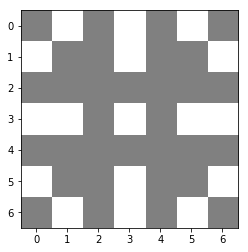

In [8]:
check = np.zeros((7, 7))
check[::3, 1::2] = 1
check[1::2, ::3] = 1
plt.imshow(check, cmap='gray', interpolation='nearest', alpha=0.5);

### Quizes

In [9]:
# Quiz: Compute Cost
# 7

In [10]:
# Quiz: Compute Cost 2
# 6

In [11]:
# Quiz: Optimal Path
# 15

In [12]:
# Quiz: Optimal Path 2
# 16

In [13]:
# Quiz: Maze
# 7

In [14]:
# Quiz: Maze 2
# 11

In [15]:
# Quiz: First Search Program
# ----------
# User Instructions:
# 
# Define a function, search() that returns a list
# in the form of [optimal path length, row, col]. For
# the grid shown below, your function should output
# [11, 4, 5].
#
# If there is no valid path from the start point
# to the goal, your function should return the string
# 'fail'
# ----------

# Grid format:
#   0 = Navigable space
#   1 = Occupied space

grid1 = [[0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 1, 0]]
init1 = [0, 0]
goal1 = [len(grid1)-1, len(grid1[0])-1]
cost1 = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']


def search(grid,init,goal,cost):
    # ----------------------------------------
    # insert code here
    # ----------------------------------------
    path = 'fail'
    way = [0, init[0], init[1]]
    ways = []
    
    while True:        
        if way[1] == goal[0] and way[2] == goal[1]:
            path = way
            break
            
        for direction in delta:
            new_way = [way[0] + cost, way[1] + direction[0], way[2] + direction[1]]
            
            if (new_way[1] > -1) & (new_way[1] < len(grid)) & (new_way[2] > -1) & (new_way[2] < len(grid[0])):
                if (grid[new_way[1]][new_way[2]] == 0):
                    ways.append(new_way)
                
        grid[way[1]][way[2]] = 3
        
        if len(ways) == 0:
            break
            
        ways.sort()

        way = ways[0]
#        print (way)
        ways.pop(0)
        
    return path

In [16]:
search(grid1,init1,goal1,cost1)

[11, 4, 5]

In [17]:
def search2(grid,init,goal,cost):
    # ----------------------------------------
    # insert code here
    # ----------------------------------------
    path = 'fail'
    way = [0, init[0], init[1], 'start']
    ways = []
    directions = []
    
    while True:        
        if way[1] == goal[0] and way[2] == goal[1]:
            path = way[:3]
            break
            
        for i in range(len(delta)):
            new_way = [way[0] + cost, way[1] + delta[i][0], way[2] + delta[i][1], delta_name[i]]
            
            if (new_way[1] > -1) & (new_way[1] < len(grid)) & (new_way[2] > -1) & (new_way[2] < len(grid[0])):
                if (grid[new_way[1]][new_way[2]] == 0):
                    ways.append(new_way)
                    
                
        grid[way[1]][way[2]] = 3
        
        if len(ways) == 0:
            break
            
        ways.sort()

        way = ways[0]
        
        directions.append([ways[0][0],ways[0][3]])
#        print (way)
        ways.pop(0)

    return path, directions

In [18]:
grid1 = [[0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 0],
         [0, 0, 0, 0, 1, 0]]
init1 = [0, 0]
goal1 = [len(grid1)-1, len(grid1[0])-1]
cost1 = 1
directions = search2(grid1,init1,goal1,cost1)[1]

In [19]:
print(directions)

[[1, '>'], [1, 'v'], [2, '>'], [2, 'v'], [2, 'v'], [3, '>'], [3, 'v'], [3, 'v'], [3, 'v'], [4, '>'], [4, '>'], [4, '>'], [4, '>'], [4, 'v'], [4, 'v'], [4, 'v'], [4, 'v'], [5, '>'], [5, '>'], [5, '>'], [5, '>'], [5, 'v'], [5, 'v'], [5, 'v'], [5, 'v'], [6, '^'], [6, '^'], [6, '^'], [6, '>'], [6, '>'], [6, '>'], [6, '>'], [6, '>'], [7, '^'], [7, '^'], [7, '^'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [7, '>'], [8, '>'], [8, '>'], [8, '>'], [8, '^'], [8, '^'], [8, '^'], [8, '>'], [8, '>'], [8, '>'], [9, '>'], [9, '>'], [9, '>'], [9, '>'], [9, '>'], [9, '>'], [9, '^'], [9, '^'], [9, '^'], [9, 'v'], [9, 'v'], [9, 'v'], [10, 'v'], [10, 'v'], [10, 'v'], [11, 'v']]


In [20]:
values = set(map(lambda x:x[0], directions))
values
newlist = [[x, [y[1] for y in directions if y[0]==x]] for x in values]
newlist

[[1, ['>', 'v']],
 [2, ['>', 'v', 'v']],
 [3, ['>', 'v', 'v', 'v']],
 [4, ['>', '>', '>', '>', 'v', 'v', 'v', 'v']],
 [5, ['>', '>', '>', '>', 'v', 'v', 'v', 'v']],
 [6, ['^', '^', '^', '>', '>', '>', '>', '>']],
 [7, ['^', '^', '^', '>', '>', '>', '>', '>', '>', '>', '>']],
 [8, ['>', '>', '>', '^', '^', '^', '>', '>', '>']],
 [9, ['>', '>', '>', '>', '>', '>', '^', '^', '^', 'v', 'v', 'v']],
 [10, ['v', 'v', 'v']],
 [11, ['v']]]

In [22]:
# Quiz: Expansion Grid
# -----------
# User Instructions:
# 
# Modify the function search so that it returns
# a table of values called expand. This table
# will keep track of which step each node was
# expanded.
#
# Make sure that the initial cell in the grid 
# you return has the value 0.
# ----------

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search3(grid,init,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]
    
    expand = [[-1 for i in range(len(grid[0]))] for j in range(len(grid))]
    count = 0
    
    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
 
    while not found and not resign:
        if len(open) == 0:
            resign = True
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            
            expand[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
    return expand

In [23]:
search3(grid,init,goal,cost)

[[0, 1, -1, 11, 15, 18],
 [2, 3, 5, 8, 12, 16],
 [4, 6, -1, 13, -1, 19],
 [7, 9, -1, 17, -1, 21],
 [10, 14, -1, 20, -1, 22]]

In [24]:
# Quiz: Print Path
# -----------
# User Instructions:
#
# Modify the the search function so that it returns
# a shortest path as follows:
# 
# [['>', 'v', ' ', ' ', ' ', ' '],
#  [' ', '>', '>', '>', '>', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', '*']]
#
# Where '>', '<', '^', and 'v' refer to right, left, 
# up, and down motions. Note that the 'v' should be 
# lowercase. '*' should mark the goal cell.
#
# You may assume that all test cases for this function
# will have a path from init to goal.
# ----------

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search4(grid,init,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand

    result = [[-1 for i in range(len(grid[0]))] for j in range(len(grid))]
    count = 0
    
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return 'fail'
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            
            result[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
            
    edges = []
    for i in range(len(result)):
        for j in range(len(result[0])):
            if  result[i][j] == -1:
                continue
            else:
                next_elements = []

                for l in range(len(delta)):
                    i2, j2 = i + delta[l][0], j + delta[l][1]
                    if i2 >= 0 and i2 < len(result) and j2 >=0 and j2 < len(result[0]):
                        if result[i2][j2] > result[i][j]:
                            next_elements.append([result[i][j], result[i2][j2], delta_name[l]])
                                
            if next_elements != []:
                for el in next_elements:
                    edges.append(el)
                    
    edges.sort(key=lambda x: x[0], reverse=True)
    edges.sort(key=lambda y: y[1], reverse=True)
    path = [edges[0]]
    i=1
    while i < len(edges):    
        if edges[i][1] == path[-1][0]:
            path.append(edges[i])
        i+=1
        
    expand = [[' ' for row in range(len(grid[0]))] for col in range(len(grid))]
    expand[goal[0]][goal[1]]='*'
    
    positions = []
 
    def find(target, matrix):
        for i, row in enumerate(matrix):
            for j, el in enumerate(row):
                if el == target:
                    return [i, j]
        return (None, None)

    for element in path:
        position = find(element[0], result)
        expand[position[0]][position[1]]=element[2]
       
    return expand # make sure you return the shortest path

In [25]:
search4(grid,init,goal,cost)

[['v', ' ', ' ', ' ', ' ', ' '],
 ['>', '>', '>', '>', '>', 'v'],
 [' ', ' ', ' ', ' ', ' ', 'v'],
 [' ', ' ', ' ', ' ', ' ', 'v'],
 [' ', ' ', ' ', ' ', ' ', '*']]

In [26]:
# Quiz: Print Path
# -----------
# User Instructions:
#
# Modify the the search function so that it returns
# a shortest path as follows:
# 
# [['>', 'v', ' ', ' ', ' ', ' '],
#  [' ', '>', '>', '>', '>', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', '*']]
#
# Where '>', '<', '^', and 'v' refer to right, left, 
# up, and down motions. Note that the 'v' should be 
# lowercase. '*' should mark the goal cell.
#
# You may assume that all test cases for this function
# will have a path from init to goal.
# ----------

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search5(grid,init,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    
    expand = [[' ' for col in range(len(grid[0]))] for row in range(len(grid))]
    
    class node:
        def __init__(self, x, y):
            self.children = [None,None,None,None]
            self.parent = None
            self.y = y
            self.x = x
            
        def coordinate_find(self,x,y):
            if self.x == x and self.y == y:
                return self
            else:
                for child in self.children:
                    if child != None:
                        if child.coordinate_find(x,y) != None:
                            return child.coordinate_find(x,y)
    
    init_node = node(x,y)
    next_node = init_node
  
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return 'fail'
            
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            
            next_node = init_node.coordinate_find(x,y)
            
            if x == goal[0] and y == goal[1]:
                found = True
                expand[x][y] = '*'
                while True:
                    parent_node = next_node.parent
                    for i in range(len(parent_node.children)):
                        if parent_node.children[i] == next_node:
                            expand[parent_node.x][parent_node.y] = delta_name[i]
                    if parent_node == init_node:
                        break
                    next_node = parent_node
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            next_node.children[i] = node(x2,y2)
                            child_node = next_node.children[i]
                            child_node.parent = next_node
                            closed[x2][y2] = 1             
       
    return expand # make sure you return the shortest path

In [27]:
search5(grid,init,goal,cost)

[['>', 'v', ' ', ' ', ' ', ' '],
 [' ', '>', '>', '>', '>', 'v'],
 [' ', ' ', ' ', ' ', ' ', 'v'],
 [' ', ' ', ' ', ' ', ' ', 'v'],
 [' ', ' ', ' ', ' ', ' ', '*']]

In [28]:
# Quiz: Implement A*
    
# -----------
# User Instructions:
#
# Modify the the search function so that it becomes
# an A* search algorithm as defined in the previous
# lectures.
#
# Your function should return the expanded grid
# which shows, for each element, the count when
# it was expanded or -1 if the element was never expanded.
# 
# If there is no path from init to goal,
# the function should return the string 'fail'
# ----------

grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]
heuristic = [[9, 8, 7, 6, 5, 4],
             [8, 7, 6, 5, 4, 3],
             [7, 6, 5, 4, 3, 2],
             [6, 5, 4, 3, 2, 1],
             [5, 4, 3, 2, 1, 0]]

init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def search6(grid,init,goal,cost,heuristic):
    # ----------------------------------------
    # modify the code below
    # ----------------------------------------
    closed = [[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]][init[1]] = 1

    expand = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
#     action = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]

    x, y = init[0], init[1]
    g, step, count = 0, 0, 0

    open = [[step, g, x, y]]

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return "Fail"
        else:
            open.sort(reverse=True)
            next_open = open.pop()
            
            x, y = next_open[2], next_open[3]
            step, g = next_open[0], next_open[1]

            expand[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2, y2 = x + delta[i][0], y + delta[i][1]
                    
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            step2 = g2 + heuristic[x2][y2]
                            open.append([step2, g2, x2, y2])
                            closed[x2][y2] = 1

    return expand

In [29]:
search6(grid,init,goal,cost,heuristic)

[[0, -1, -1, -1, -1, -1],
 [1, -1, -1, -1, -1, -1],
 [2, -1, -1, -1, -1, -1],
 [3, -1, 8, 9, 10, 11],
 [4, 5, 6, 7, -1, 12]]

In [34]:
grid2 = [[0, 1, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0],
         [0, 1, 1, 0, 0, 0],
         [0, 1, 0, 0, 1, 0]]

search6(grid2,init,goal,cost,heuristic)

[[0, -1, -1, -1, -1, -1],
 [1, 2, 4, 6, 9, 11],
 [3, -1, 7, 10, 12, 14],
 [5, -1, -1, 13, 15, 17],
 [8, -1, -1, 16, -1, 18]]

In [35]:
heuristic2 = [[0 for col in range(len(grid2[0]))] for row in range(len(grid2))]
search6(grid2,init,goal,cost,heuristic2)

[[0, -1, 6, -1, 12, 16],
 [1, 2, 4, 7, 10, 13],
 [3, -1, 8, 11, 14, 17],
 [5, -1, -1, 15, 18, 20],
 [9, -1, 21, 19, -1, 22]]

##   &#x1F916; &nbsp; <span style="color:red">Section 13. Problem Set 4</span>

##   &#x1F916; &nbsp; <span style="color:red">Section 14. Office Hours Week 4</span>